In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster as clst
import sklearn.preprocessing as prep

In [87]:
df = pd.read_csv('incomes.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


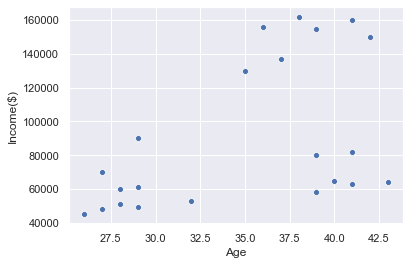

In [88]:
data_plot = df[{'Age':'Age','Income($)':'Income'}]
sb.scatterplot(x='Age',y='Income($)',data=df)
sb.set(style='darkgrid',)
plt.show()

In [89]:
km =clst.KMeans(n_clusters=3)
clstr_result = km.fit_predict(df[['Age','Income($)']])
clstr_result

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [90]:
df['cluster'] = clstr_result
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


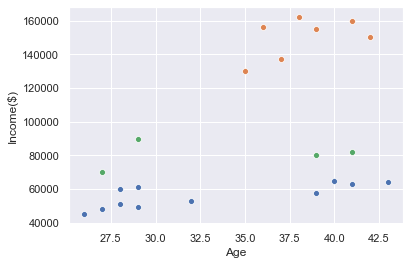

In [91]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

sb.scatterplot(x=df1.Age,y=df1['Income($)'],data=df1,markers=True)
sb.scatterplot(x=df2.Age,y=df2['Income($)'],data=df2,markers=True)
sb.scatterplot(x=df3.Age,y=df3['Income($)'],data=df3,markers=True)

From the above graph we see that two bottom cluster is showing inconsistency.
This is happening because of not good scaling.Income is in very large number compared to age

## This is for feature scaling

In [92]:
scaller = prep.MinMaxScaler()
df['Income($)'] = scaller.fit(df[['Income($)']]).transform(df[['Income($)']])
df['Age'] = scaller.fit(df[['Age']]).transform(df[['Age']])

In [93]:
km = clst.KMeans(n_clusters=3)
predicted_cluster = km.fit_predict(df[['Age','Income($)']])

In [102]:
df.cluster = predicted_cluster
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


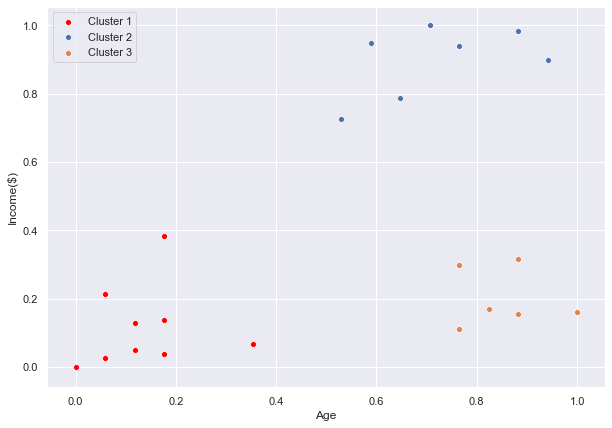

In [103]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.figure(figsize=(10,7))
sb.scatterplot(x=df1.Age,y=df1['Income($)'],data=df1,color='red')
sb.scatterplot(x=df2.Age,y=df2['Income($)'],data=df2)
sb.scatterplot(x=df3.Age,y=df3['Income($)'],data=df3)
plt.legend(labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])

Now clusters was formed successfully 

## Elbow plot demonstration

In [108]:
k_range = range(1,11)
sse = []

for k in k_range:
    km = clst.KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

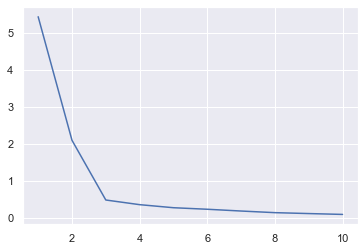

In [110]:
sb.lineplot(x=k_range,y=sse)

In [111]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.22476961228772668,
 0.17681044133887713,
 0.1327661931978319,
 0.10824862283029266,
 0.08510915216361345]